<a href="https://colab.research.google.com/github/farisazizy/dota2-733e-meta-analysis/blob/main/GG3_DA_GG3DAUP0032_MIDTERM_TEST_FILE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Farishadi Mufakkir Azizy - GG3DAUP0032

# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import textwrap
import warnings

warnings.filterwarnings('ignore')

# Import Data

In [ ]:
df = pd.read_csv('Current_Pro_meta.csv')
df = df.drop(df.columns[0], axis = 1)
df

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,Abaddon,all,Melee,150,"Support, Carry, Durable",22,46,108,47.83,False
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",50,102,86,49.02,False
2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",25,53,84,47.17,False
3,Anti-Mage,agi,Melee,150,"Carry, Escape, Nuker",76,175,636,43.43,False
4,Arc Warden,agi,Ranged,625,"Carry, Escape, Nuker",8,16,74,50.00,False
...,...,...,...,...,...,...,...,...,...,...
119,Windranger,all,Ranged,600,"Carry, Support, Disabler, Escape, Nuker",227,461,887,49.24,False
120,Winter Wyvern,all,Ranged,425,"Support, Disabler, Nuker",29,57,347,50.88,False
121,Witch Doctor,int,Ranged,550,"Support, Nuker, Disabler",38,72,20,52.78,True
122,Wraith King,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator",38,68,24,55.88,True


In [ ]:
df['Times Picked'].isnull().any()

False

In [ ]:
df.to_csv('Current_Pro_meta_fixed.csv', index=False)

# Create specific table for every hero roles

## proceed to split

In [ ]:
# Create a new DataFrame with each row containing one role per hero
roles_df = df.copy()

# If 'Times Picked' and 'Win Rate' are not numeric columns, you might need to convert them to numeric types.
roles_df['Times Picked'] = pd.to_numeric(roles_df['Times Picked'], errors='coerce')
roles_df['Win Rate'] = pd.to_numeric(roles_df['Win Rate'], errors='coerce')

# Split the roles into separate columns
roles_df['Roles'] = roles_df['Roles'].str.split(',')

# Use melt to reshape the DataFrame with one role per row for each hero
roles_df = roles_df.explode('Roles').reset_index(drop=True)

# Strip leading/trailing whitespaces from the roles
roles_df['Roles'] = roles_df['Roles'].str.strip()

# Sort the new DataFrame by 'Name' and 'Roles' to group the roles for each hero together
roles_df.sort_values(['Name', 'Roles'], inplace=True)

# Reset the index again after sorting to have a continuous index without duplicates
roles_df.reset_index(drop=True, inplace=True)

# Print the new table with each hero's roles split into separate rows
roles_df

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,Abaddon,all,Melee,150,Carry,22,46,108,47.83,False
1,Abaddon,all,Melee,150,Durable,22,46,108,47.83,False
2,Abaddon,all,Melee,150,Support,22,46,108,47.83,False
3,Alchemist,str,Melee,150,Carry,50,102,86,49.02,False
4,Alchemist,str,Melee,150,Disabler,50,102,86,49.02,False
...,...,...,...,...,...,...,...,...,...,...
476,Wraith King,str,Melee,150,Durable,38,68,24,55.88,True
477,Wraith King,str,Melee,150,Initiator,38,68,24,55.88,True
478,Wraith King,str,Melee,150,Support,38,68,24,55.88,True
479,Zeus,int,Ranged,380,Carry,70,145,232,48.28,False


In [ ]:
roles_df.to_csv('roles.csv', index=False)

## Add to CSV per roles

In [ ]:
for role, role_group in roles_df.groupby('Roles'):
    role_table = role_group[['Name', 'Roles', 'Total Pro wins', 'Times Picked', 'Times Banned', 'Win Rate', 'Niche Hero?']].copy()
    role_table.reset_index(drop=True, inplace=True)
    role_table.to_csv(f'roles_{role.lower()}.csv', index=False)

# Check Correlation

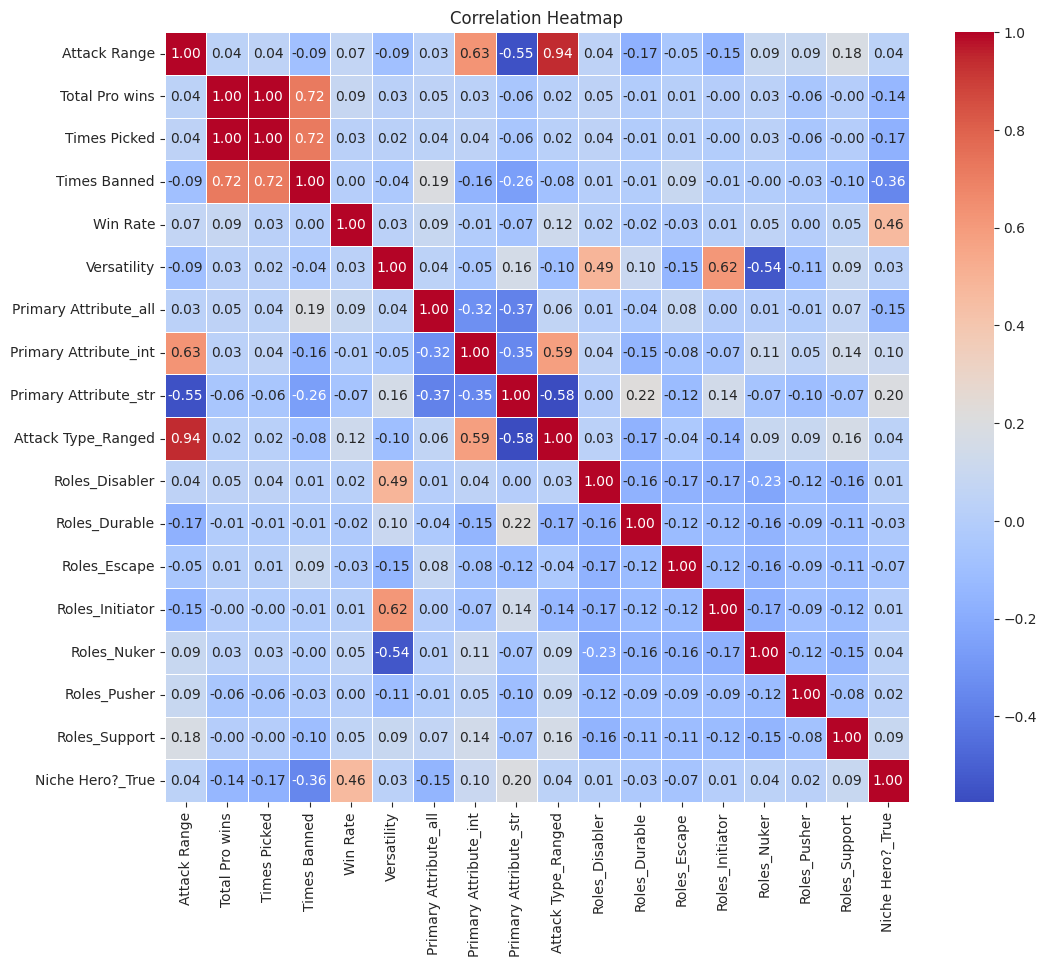

In [ ]:
# Convert categorical columns to dummy variables using one-hot encoding
categorical_columns = ['Primary Attribute', 'Attack Type', 'Roles', 'Niche Hero?']
df_encoded = pd.get_dummies(roles_df, columns=categorical_columns, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

So based on this, the data that will be proceed will only the high correlation value. columns like Attack Type and Attack Range will not be processed since it's not too impactful for the match

# Pick and Ban Analysis

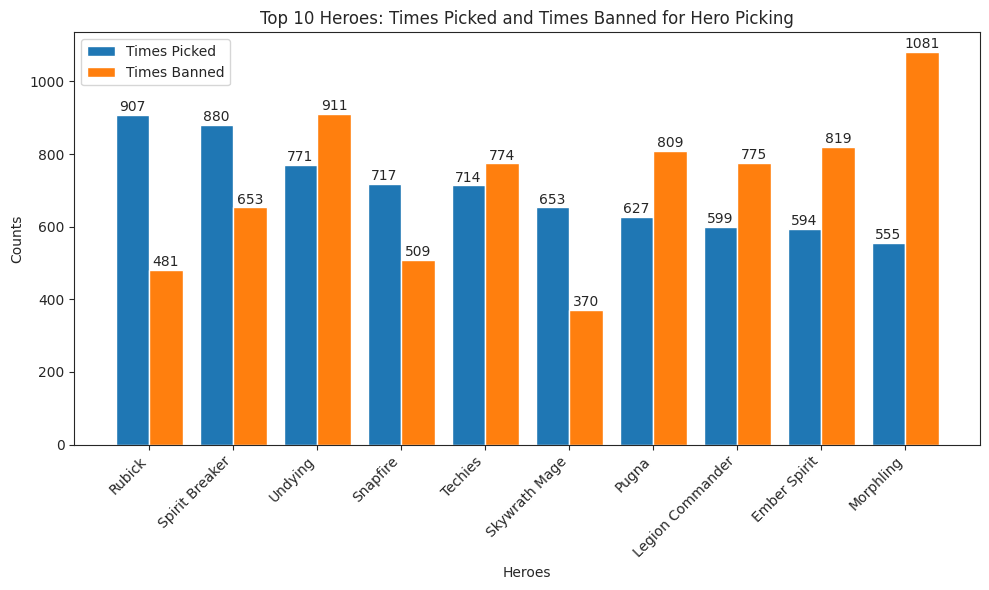

In [ ]:
heroes = df['Name']
times_picked = df['Times Picked']
times_banned = df['Times Banned']

# Combine hero names, times picked, and times banned
data = list(zip(heroes, times_picked, times_banned))

# Sort the data based on Times Picked in descending order
data.sort(key=lambda x: x[1], reverse=True)

# Extract the top 10 heroes
top_10_heroes = data[:10]
heroes, times_picked, times_banned = zip(*top_10_heroes)

# Create a bar chart for Times Picked and Times Banned
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
index = range(len(heroes))

bar1 = ax.bar(index, times_picked, bar_width, label='Times Picked')
bar2 = ax.bar([i + bar_width for i in index], times_banned, bar_width, label='Times Banned')

# Add labels with exact numeric values above each bar
for i, v in enumerate(times_picked):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=10)

for i, v in enumerate(times_banned):
    ax.text(i + bar_width, v + 2, str(v), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Heroes')
ax.set_ylabel('Counts')
ax.set_title('Top 10 Heroes: Times Picked and Times Banned for Hero Picking')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(heroes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

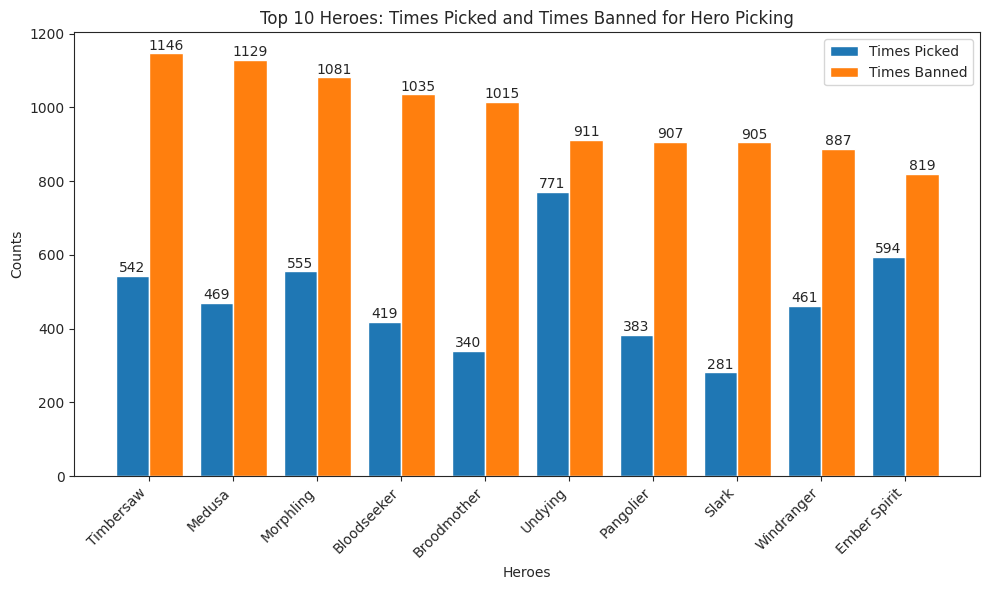

In [ ]:
heroes = df['Name']
times_picked = df['Times Picked']
times_banned = df['Times Banned']

# Combine hero names, times picked, and times banned
data = list(zip(heroes, times_picked, times_banned))

# Sort the data based on Times Picked in descending order
data.sort(key=lambda x: x[2], reverse=True)

# Extract the top 10 heroes
top_10_heroes = data[:10]
heroes, times_picked, times_banned = zip(*top_10_heroes)

# Create a bar chart for Times Picked and Times Banned
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
index = range(len(heroes))

bar1 = ax.bar(index, times_picked, bar_width, label='Times Picked')
bar2 = ax.bar([i + bar_width for i in index], times_banned, bar_width, label='Times Banned')

# Add labels with exact numeric values above each bar
for i, v in enumerate(times_picked):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=10)

for i, v in enumerate(times_banned):
    ax.text(i + bar_width, v + 2, str(v), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Heroes')
ax.set_ylabel('Counts')
ax.set_title('Top 10 Heroes: Times Picked and Times Banned for Hero Picking')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(heroes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

From the two graph above, we can see that top 3 the most picked heroes in the ESL Dreamleague Season 20 is Rubick, Spirit Breaker, and Undying. We might be thinking that those three heroes will be beneficial for their teams to do the strategies that they've been planned in this meta

Besides, we have the most top 3 Banned hero by the teams during ESL Dreamleague Season 20, which is Timbersaw, Medusa, and morphling.

Something interesting to mention is in the Top 10 Picked heroes and top 10 banned heroes, there is the same hero such as: Undying and Morphling. The teams is so desperate to anticipate the pick for those hero and at the same time they wanted to pick the hero.

Timbersaw, Medusa, and as i mentioned before, Morphling, become the most top three banned hero. Perhaps this heroes have a big disanvantage for the match even though they wanted to pick. But it's kind of gambling which you should take a risk the hero will be picked by the enemy.

# Win Rate Analysis


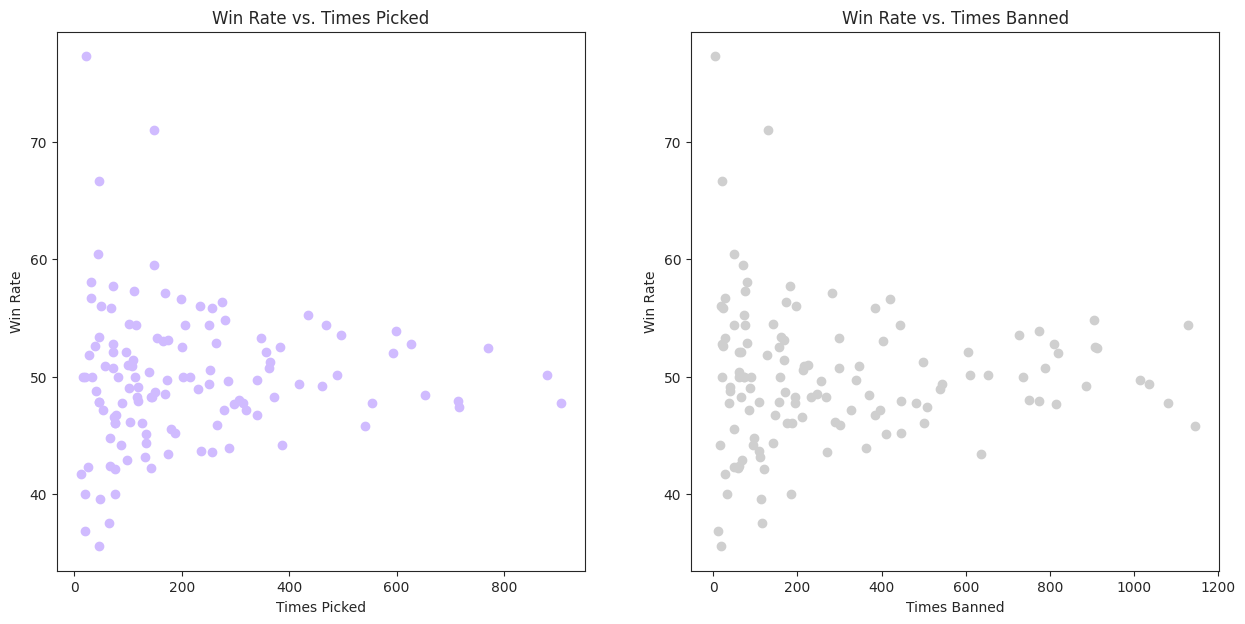

In [ ]:
# Set the plot style to 'ticks' and choose pastel colors
sns.set_style('ticks')
colors = sns.color_palette('pastel')

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot a scatter plot in the first subplot (left) for 'Times Picked' vs. 'Win Rate'
ax[0].scatter(data=df, x='Times Picked', y='Win Rate', color=colors[4])
ax[0].set_xlabel('Times Picked')
ax[0].set_ylabel('Win Rate')
ax[0].set_title('Win Rate vs. Times Picked')

# Plot a scatter plot in the second subplot (right) for 'Times Banned' vs. 'Win Rate'
ax[1].scatter(data=df, x='Times Banned', y='Win Rate', color=colors[7])
ax[1].set_xlabel('Times Banned')
ax[1].set_ylabel('Win Rate')
ax[1].set_title('Win Rate vs. Times Banned')

# Show the plots
plt.show()


The analysis suggests that there is a modest correlation between the Win Rate and the "Times Picked" and "Times Banned" features. However, this correlation becomes less reliable for heroes with lower pick rates. In other words, the relationship between Win Rate and pick/ban frequency is more evident for frequently picked heroes, but less so for heroes that are picked less frequently.

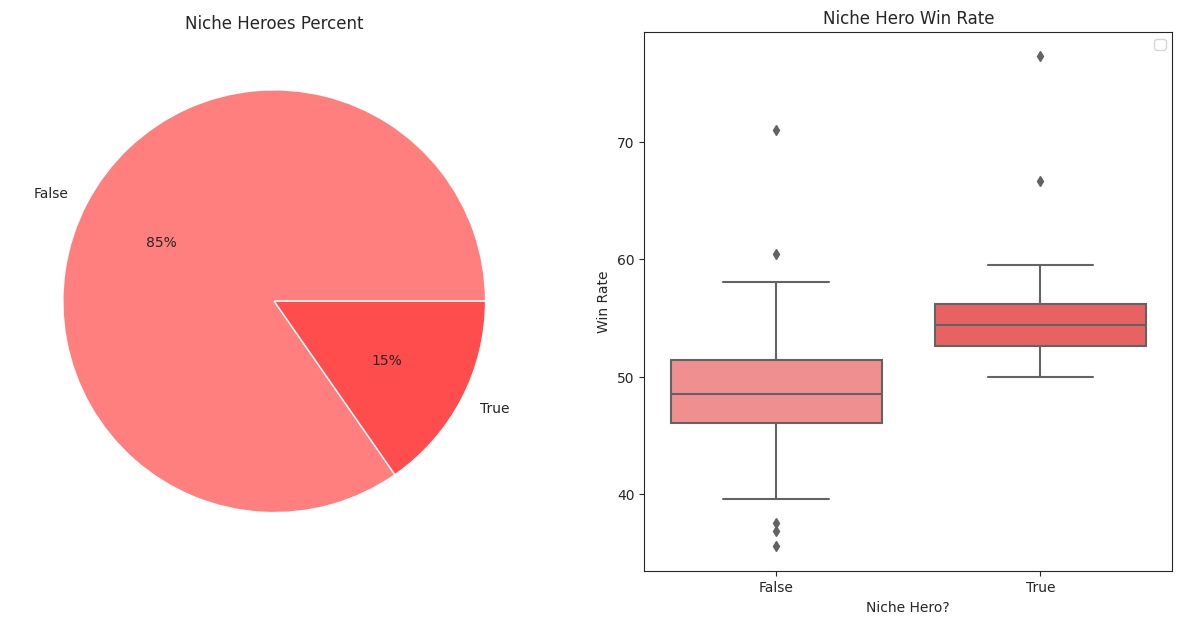

In [57]:
# Create subplots with a 1x2 grid and set the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot a pie chart for the distribution of Niche Hero? column
ax[0].pie(x=df['Niche Hero?'].value_counts(),
          labels=df['Niche Hero?'].value_counts().index,
          colors=colors,
          autopct='%.0f%%')  # Display percentage values on the pie chart
ax[0].set_title('Niche Heroes Percent')  # Set the title for the pie chart

# Plot a boxplot to visualize the win rate distribution for Niche Hero? categories
sns.boxplot(data=df, x='Niche Hero?', y='Win Rate', palette=colors, ax=ax[1])
ax[1].set_title('Niche Hero Win Rate')  # Set the title for the boxplot

plt.legend()  # Display the legend for the boxplot

plt.show()  # Show the plots

Niche Heroes represent around a quarter of all heroes in the game, and as a group have a slightly higher median win rate than heroes that are picked at a reasonable rate.

Heroes can be niche for a variety of reasons; they can be used to counter other picks, player mastery, team composition, pocket strategies, or may not be in the current meta

# Roles Analysis

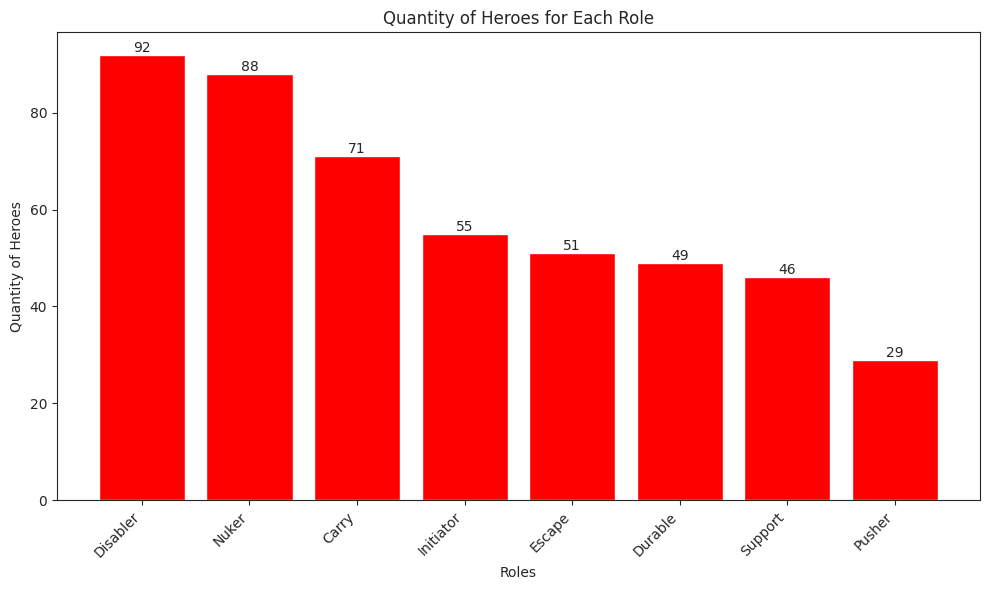

In [ ]:
# Group the data by "Roles" and calculate the count of heroes for each role
heroes_per_role = roles_df.groupby('Roles')['Name'].nunique().reset_index()

# Sort the data based on the count of heroes in descending order
heroes_per_role = heroes_per_role.sort_values(by='Name', ascending=False)

# Create a bar plot for the quantity of heroes per role
plt.figure(figsize=(10, 6))
bars = plt.bar(heroes_per_role['Roles'], heroes_per_role['Name'], color='#FF0000')
plt.xlabel('Roles')
plt.ylabel('Quantity of Heroes')
plt.title('Quantity of Heroes for Each Role')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

NOTE that hero can have more than one role

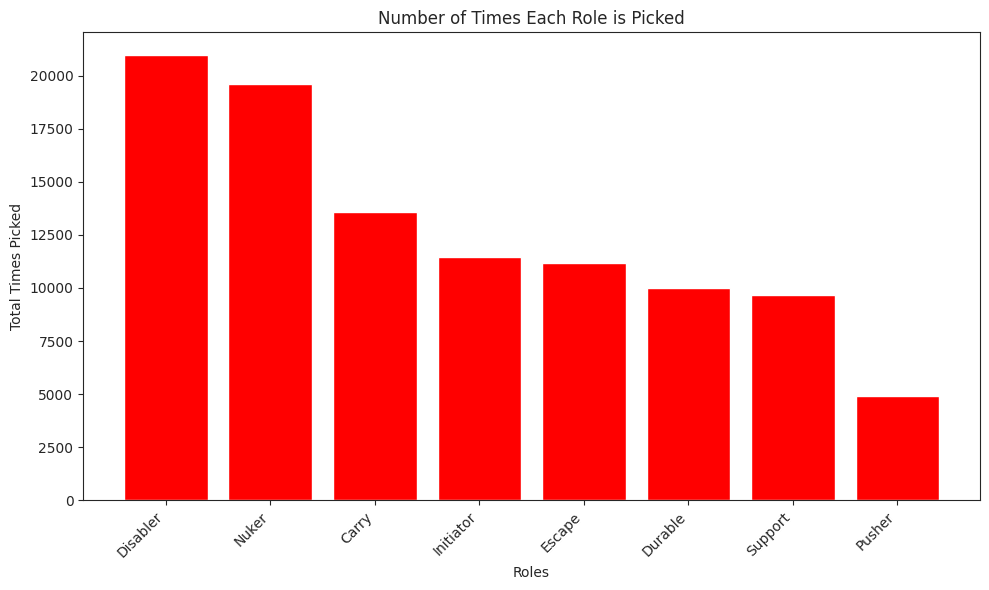

In [ ]:
# Group the data by "Roles" and calculate the total times picked for each role
roles_picked = roles_df.groupby('Roles')['Times Picked'].sum().reset_index()

# Sort the data based on the total times picked in descending order
roles_picked = roles_picked.sort_values(by='Times Picked', ascending=False)

# Create a bar plot for the number of roles picked
plt.figure(figsize=(10, 6))
plt.bar(roles_picked['Roles'], roles_picked['Times Picked'], color='#FF0000')
plt.xlabel('Roles')
plt.ylabel('Total Times Picked')
plt.title('Number of Times Each Role is Picked')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The design philosophy for heroes in the game is characterized by a deliberate emphasis on creating a greater number of disablers compared to pushers. In other words, disablers are intentionally given more attention and thought during the hero design process, while pushers receive comparatively less focus.

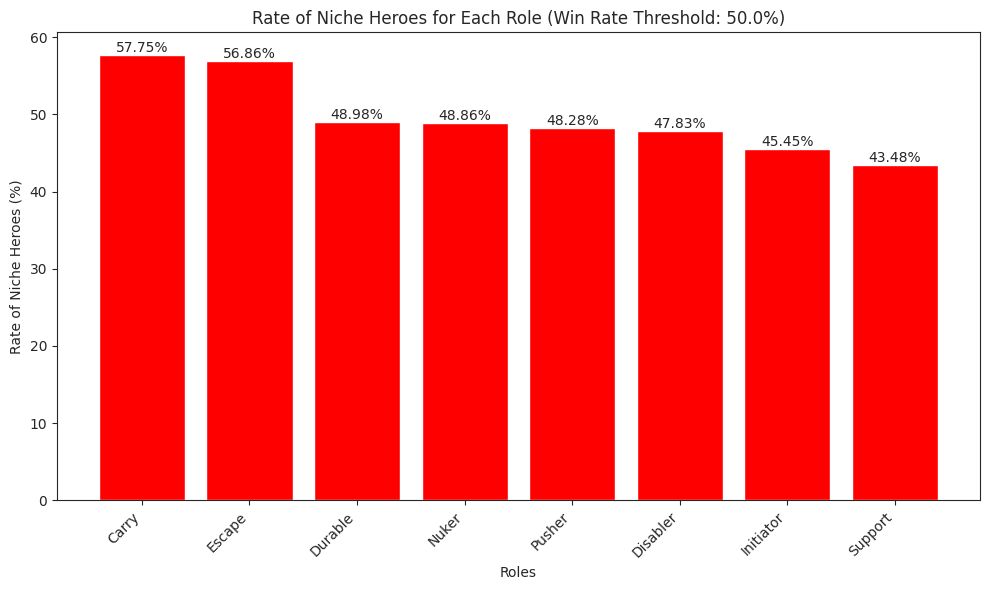

In [ ]:
# Define the threshold for niche heroes' win rate
win_rate_threshold = 50.0

# Calculate the rate of niche heroes for each role
role_rates = roles_df[roles_df['Win Rate'] < win_rate_threshold].groupby('Roles').size() / roles_df.groupby('Roles').size()

# Sort the roles based on the rate of niche heroes in descending order
role_rates = role_rates.sort_values(ascending=False)

# Create a bar plot for the rate of niche heroes per role
plt.figure(figsize=(10, 6))
bars = plt.bar(role_rates.index, role_rates * 100, color='#FF0000')
plt.xlabel('Roles')
plt.ylabel('Rate of Niche Heroes (%)')
plt.title(f'Rate of Niche Heroes for Each Role (Win Rate Threshold: {win_rate_threshold}%)')
plt.xticks(rotation=45, ha='right')

# Add labels with the exact numeric values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Attribute Analysis

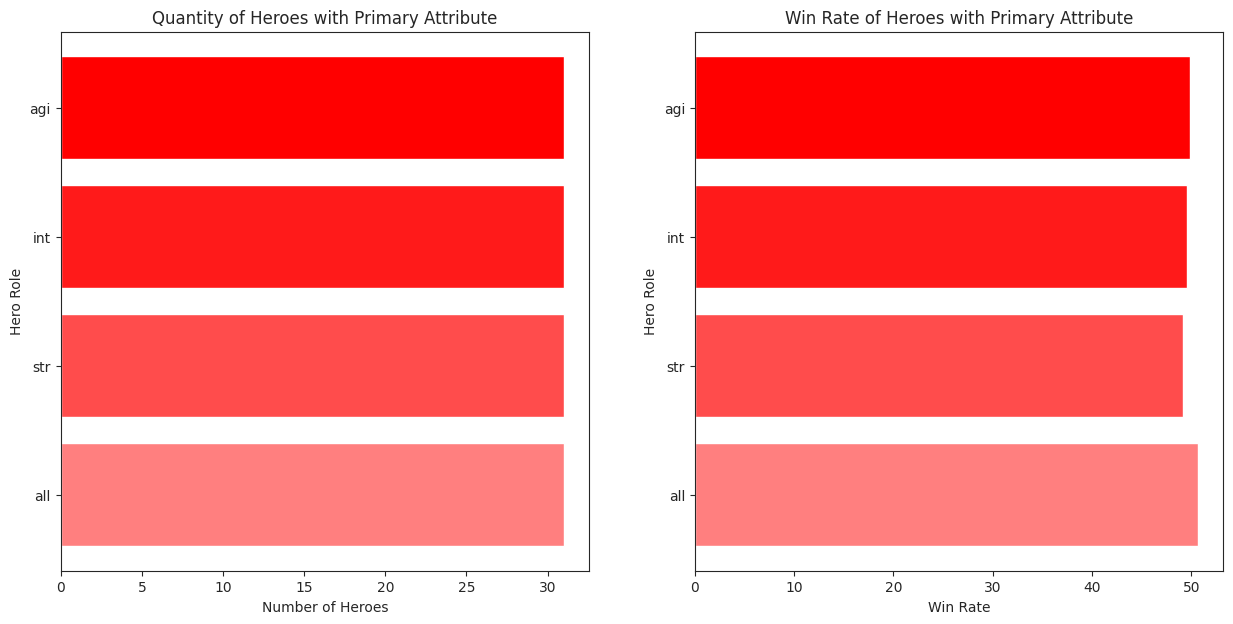

In [ ]:
from collections import Counter

attributes = df['Primary Attribute']
attributes = Counter(attributes)

counts = []
winrate = []
niche = []
verst = []

# Loop through each primary attribute and calculate counts and win rates
for i in list(attributes.keys()):
    filt = (df['Primary Attribute'] == i)
    winrate.append(df[filt]['Win Rate'].mean())
    niche.append(df[filt]['Niche Hero?'].sum())
    verst.append(df[filt]['Versatility'].mean())
    counts.append(attributes[i])

# Define the colors for the bar charts (red theme)
colors = ['#FF7F7F', '#FF4C4C', '#FF1A1A', '#FF0000', '#CC0000']

fig, ax = plt.subplots(1, 2, figsize = (15, 7))

# Plot the quantity of heroes with primary attribute
ax[0].barh(list(attributes.keys()), counts, color = colors)
ax[0].set_ylabel('Hero Role')
ax[0].set_xlabel('Number of Heroes')
ax[0].set_title('Quantity of Heroes with Primary Attribute')

# Plot the win rate of heroes with primary attribute
ax[1].barh(list(attributes.keys()), winrate, color = colors)
ax[1].set_ylabel('Hero Role')
ax[1].set_xlabel('Win Rate')
ax[1].set_title('Win Rate of Heroes with Primary Attribute')
plt.show()

The dataset shows that the number of heroes with each primary attribute is evenly distributed among the four attributes. It is interesting to observe that there is a balanced representation of heroes belonging to each primary attribute category.

Furthermore, the win rate of heroes is fairly evenly spread across all primary attributes. This implies that there is no significant bias towards any specific primary attribute when considering the win rates of the heroes in the dataset.

***We might be thinking it has nothing to do with the impact of experience of the gameplay so it will be ignored***

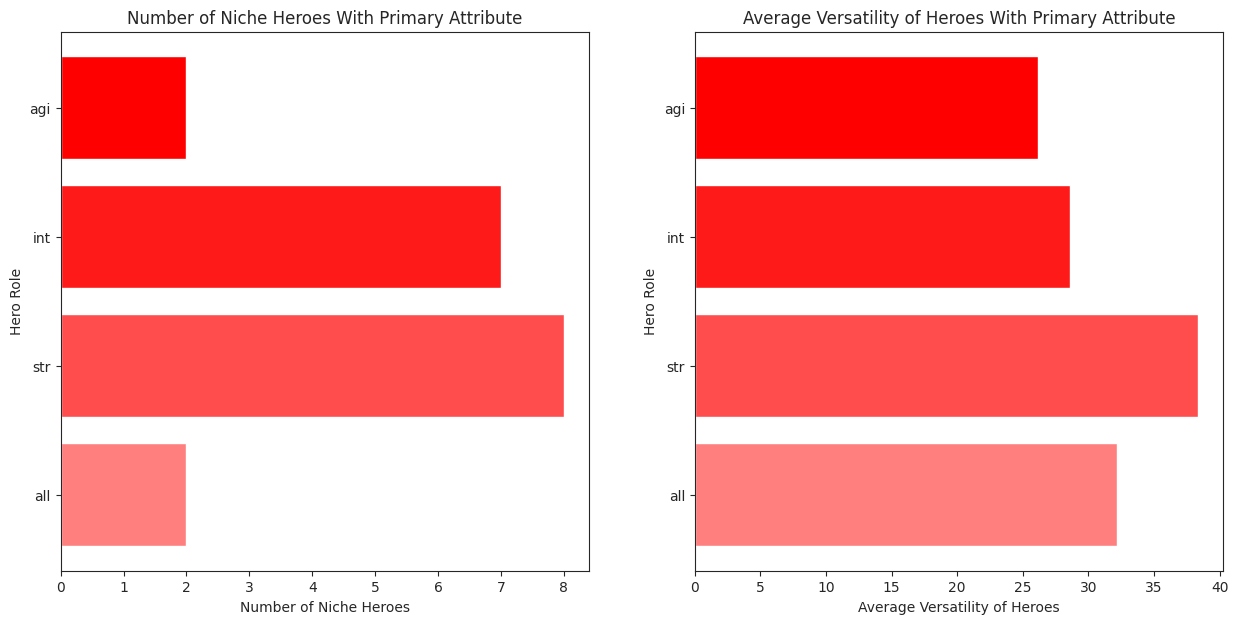

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

# Plot the number of niche heroes with each primary attribute
ax[0].barh(list(attributes.keys()), niche, color = colors)
ax[0].set_ylabel('Hero Role')
ax[0].set_xlabel('Number of Niche Heroes')
ax[0].set_title('Number of Niche Heroes With Primary Attribute')

# Plot the average versatility for heroes with each primary attribute
ax[1].barh(list(attributes.keys()), verst, color = colors)
ax[1].set_ylabel('Hero Role')
ax[1].set_xlabel('Average Versatility of Heroes')
ax[1].set_title('Average Versatility of Heroes With Primary Attribute')
plt.show()

The majority of niche picks in the dataset belong to intelligence (int) and strength (str) heroes, as these attributes are significantly more represented compared to agility (agi) heroes. This indicates a preference for int and str heroes when it comes to niche picks.

Additionally, the average versatility of heroes is fairly evenly distributed across all four primary attributes, with agility heroes (agi) having the lowest average versatility and strength heroes (str) having the highest. This observation suggests that the strength attribute might offer more diverse and varied gameplay mechanics compared to the other attributes.

***We might be thinking it has nothing to do with the impact of experience of the gameplay so it will be ignored***